In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Digi Scholarship/Demo Day/twitter_classification/tweets.csv')
df

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0
...,...,...,...,...,...
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


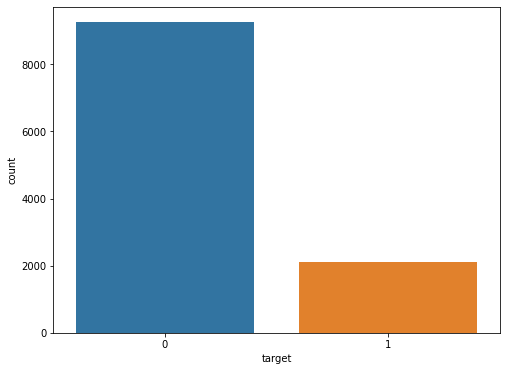

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(df.target)
plt.show()

In [ ]:
df.keyword.unique()

array(['ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'bush%20fires', 'casualties', 'casualty', 'catastrophe',
       'catastrophic', 'chemical%20emergency', 'cliff%20fall', 'collapse',
       'collapsed', 'collide', 'collided', 'collision', 'crash',
       'crashed', 'crush', 'crushed', 'curfew', 'cyclone', 'damage',
       'danger', 'dead', 'death', 'deaths', 'debris', 'deluge', 'deluged',
       'demolish', 'demolished', 'demolition', 'derail', 'derailed',
       'derailment', 'desol

## **Preprocessing**

In [ ]:
# Remove Emoticon
def remove_emot(text):
    emoticon = re.compile("["
                           u"\U0001F600-\U0001F64F" 
                           u"\U0001F300-\U0001F5FF" 
                           u"\U0001F680-\U0001F6FF" 
                           u"\U0001F1E0-\U0001F1FF" 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoticon.sub(r'', text)

# Remove Stopword & Punctuation
def stop_punc(text):  
    stop_words = stopwords.words('english')
    
    punc = [token for token in text if token not in string.punctuation]
    punc = ''.join(punc)
    
    return ' '.join([word for word in punc.split() if word .lower() not in stop_words])

In [ ]:
df['clean_text'] = df.text.apply(remove_emot).apply(stop_punc)
df

,id,keyword,location,text,target,clean_text
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1,Communal violence Bhainsa Telangana Stones pel...
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1,Telangana Section 144 imposed Bhainsa January ...
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1,Arsonist sets cars ablaze dealership httpstcog...
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1,Arsonist sets cars ablaze dealership httpstco0...
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0,Lord Jesus love brings freedom pardon Fill Hol...
...,...,...,...,...,...,...
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0,Media warned us well advance wrecked whole nig...
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0,feel directly attacked consider moonbin amp ji...
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0,feel directly attacked consider moonbin amp ji...
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0,ok remember outcast nd dora au AU WRECKED NERV...


In [ ]:
X = df['clean_text'].values
y = df['target'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## **Tokenization**

In [ ]:
#tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer = Tokenizer(num_words=5000, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

padding_train = pad_sequences(sequences_train)
padding_test = pad_sequences(sequences_test)

print(padding_train.shape)
print(padding_train)
print(padding_test.shape)
print(padding_test)

(8527, 21)
[[   0    0    0 ... 2694    6 1258]
 [   0    0    0 ...  106  936 2695]
 [   0    0    0 ...  766 2999 2184]
 ...
 [   0    0    0 ... 1293 2144  785]
 [   0    0    0 ... 2885 2727  688]
 [   0    0    0 ...    4  333  180]]
(2843, 17)
[[   0    0  615 ...  875 3419 2560]
 [   0    0    0 ... 3443 1890    4]
 [   0    0    0 ... 2542  190 1199]
 ...
 [   0    0    0 ...    2  373   35]
 [   0    0    0 ... 1186  886    2]
 [   0    0    0 ...  172  282  350]]


In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(input_dim=5000, output_dim=32),
  tf.keras.layers.LSTM(50),
  #tf.keras.layers.Dropout(0.2), 
  tf.keras.layers.Dense(23, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          160000    
                                                                 
 lstm_2 (LSTM)               (None, 50)                16600     
                                                                 
 dense_5 (Dense)             (None, 23)                1173      
                                                                 
 dense_6 (Dense)             (None, 1)                 24        
                                                                 
Total params: 177,797
Trainable params: 177,797
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
num_epochs = 30
history = model.fit(padding_train, y_train, epochs=num_epochs, 
                    validation_data=(padding_test, y_test), verbose=2)

Epoch 1/30
267/267 - 12s - loss: 0.3894 - accuracy: 0.8454 - val_loss: 0.2874 - val_accuracy: 0.8881 - 12s/epoch - 46ms/step
Epoch 2/30
267/267 - 5s - loss: 0.2061 - accuracy: 0.9222 - val_loss: 0.2936 - val_accuracy: 0.8885 - 5s/epoch - 18ms/step
Epoch 3/30
267/267 - 5s - loss: 0.1380 - accuracy: 0.9518 - val_loss: 0.3567 - val_accuracy: 0.8924 - 5s/epoch - 18ms/step
Epoch 4/30
267/267 - 5s - loss: 0.0908 - accuracy: 0.9685 - val_loss: 0.4108 - val_accuracy: 0.8910 - 5s/epoch - 18ms/step
Epoch 5/30
267/267 - 5s - loss: 0.0562 - accuracy: 0.9815 - val_loss: 0.5494 - val_accuracy: 0.8867 - 5s/epoch - 18ms/step
Epoch 6/30
267/267 - 5s - loss: 0.0369 - accuracy: 0.9873 - val_loss: 0.5626 - val_accuracy: 0.8881 - 5s/epoch - 18ms/step
Epoch 7/30
267/267 - 5s - loss: 0.0265 - accuracy: 0.9903 - val_loss: 0.7659 - val_accuracy: 0.8843 - 5s/epoch - 18ms/step
Epoch 8/30
267/267 - 5s - loss: 0.0236 - accuracy: 0.9919 - val_loss: 0.7572 - val_accuracy: 0.8755 - 5s/epoch - 18ms/step
Epoch 9/30
267

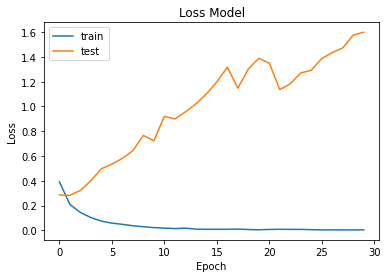

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

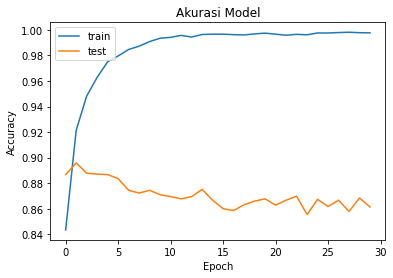

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
def predict(tweet):
    test_word = tweet

    sentence = tokenizer.texts_to_sequences([test_word])
    sentence = pad_sequences(sentence,maxlen=250)

    #prediction = model.predict(sentence)
    prediction = int(model.predict(sentence).round().item())
    
    proba =  np.max(model.predict(sentence))

    if(prediction == 0):
        return('No Disaster : ',  proba)
    else:
        return('Disaster : ',  proba)

In [ ]:
predict('only if Surajmal and Bhau had somehow forged an alliance it would hv resulted in annihilation of ummah')

('Disaster : ', 0.9999808)

In [ ]:
predict('Human Coronavirus')

('Disaster : ', 0.749852)